In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# import urllib.request

In [12]:
# Load the image
img = cv2.imread('nc.jpg', 0)

In [13]:
# Binarize the image
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [14]:
# Invert the image
binary = ~binary

In [15]:
# Function to track progress and perform skeletonization
def skeletonize(image):
  size = np.size(image)
  skel = np.zeros(image.shape, np.uint8)
  eroded_pixels = []  # List to store eroded pixel count each iteration

  ret, img = cv2.threshold(image, 127, 255, 0)
  element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
  done = False

  while not done:
    eroded = cv2.erode(img, element)
    eroded_pixels.append(size - cv2.countNonZero(eroded))  # Track eroded pixels
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(img, temp)
    skel = cv2.bitwise_or(skel, temp)
    img = eroded.copy()

    zeros = size - cv2.countNonZero(img)
    if zeros == size:
      done = True

  return skel, eroded_pixels

In [16]:
# Apply skeletonization
skeleton, eroded_pixel_counts = skeletonize(binary)

In [17]:
# Plot the images
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

(-0.5, 282.5, 177.5, -0.5)

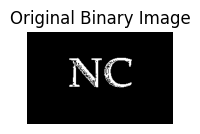

In [18]:
# Plot original binary image
plt.subplot(1, 3, 1)
plt.imshow(binary, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

(-0.5, 282.5, 177.5, -0.5)

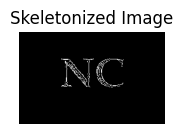

In [19]:
# Plot skeletonized image
plt.subplot(1, 3, 2)
plt.imshow(skeleton, cmap='gray')  # Check if skeleton is uint8 now
plt.title('Skeletonized Image')
plt.axis('off')

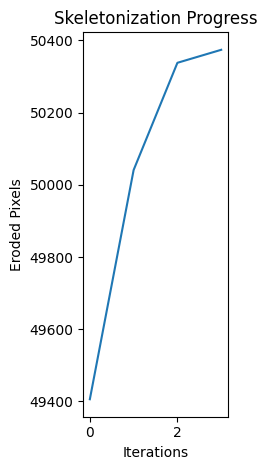

In [20]:
# Plot progress chart (eroded pixels vs iterations)
plt.subplot(1, 3, 3)
plt.plot(range(len(eroded_pixel_counts)), eroded_pixel_counts)
plt.xlabel('Iterations')
plt.ylabel('Eroded Pixels')
plt.title('Skeletonization Progress')

plt.tight_layout()
plt.show()